In [11]:
import pandas as pd
import numpy as np
import os
import urllib
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.5f' % x) #opción para evitar la notacion cientifica

url = "https://covid19.who.int/WHO-COVID-19-global-data.csv"
file_path = os.path.join("data", "covid")
os.makedirs(file_path, exist_ok=True)
csv_path = os.path.join(file_path, "WHO-COVID-19-global-data.csv")
urllib.request.urlretrieve(url, csv_path)
df = pd.read_csv(csv_path)
df.columns = [col.strip() for col in df.columns]
df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-02-24,AF,Afghanistan,EMRO,5,5,0,0
1,2020-02-25,AF,Afghanistan,EMRO,0,5,0,0
2,2020-02-26,AF,Afghanistan,EMRO,0,5,0,0
3,2020-02-27,AF,Afghanistan,EMRO,0,5,0,0
4,2020-02-28,AF,Afghanistan,EMRO,0,5,0,0
...,...,...,...,...,...,...,...,...
31652,2020-07-26,ZW,Zimbabwe,AFRO,138,2434,2,34
31653,2020-07-27,ZW,Zimbabwe,AFRO,78,2512,0,34
31654,2020-07-28,ZW,Zimbabwe,AFRO,192,2704,2,36
31655,2020-07-29,ZW,Zimbabwe,AFRO,113,2817,4,40


In [12]:
df.columns

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31657 entries, 0 to 31656
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date_reported      31657 non-null  object
 1   Country_code       31518 non-null  object
 2   Country            31657 non-null  object
 3   WHO_region         31657 non-null  object
 4   New_cases          31657 non-null  int64 
 5   Cumulative_cases   31657 non-null  int64 
 6   New_deaths         31657 non-null  int64 
 7   Cumulative_deaths  31657 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 1.9+ MB


In [14]:
df_col = df[df.Country == "Colombia"][["Date_reported", "New_cases"]]
#df_col.index = df_col.Date_reported
#df_col.columns = ["Date_reported_col", "New_cases_col"]
df_arg = df[df.Country == "Argentina"][["Date_reported", "New_cases"]]
#df_arg.index = df_arg.Date_reported
#df_arg.columns = ["Date_reported_col", "New_cases_col"]
df_per = df[df.Country == "Peru"][["Date_reported", "New_cases"]]
#df_per.index = df_per.Date_reported
#df_per.columns = ["Date_reported_col", "New_cases_col"]
df_ecu = df[df.Country == "Ecuador"][["Date_reported", "New_cases"]]
#df_ecu.index = df_ecu.Date_reported
#df_ecu.columns = ["Date_reported_col", "New_cases_col"]
df_chi = df[df.Country == "Chile"][["Date_reported", "New_cases"]]
#df_chi.index = df_chi.Date_reported
#df_chi.columns = ["Date_reported_col", "New_cases_col"]
df_rwa = df[df.Country == "Rwanda"][["Date_reported", "New_cases"]]
#df_rwa.index = df_rwa.Date_reported
#df_rwa.columns = ["Date_reported_rwa", "New_cases_rwa"]
df_ven = df[df.Country_code == "VE"][["Date_reported", "New_cases"]]
#df_ven.index = df_ven.Date_reported
#df_ven.columns = ["Date_reported_ven", "New_cases_ven"]
df_bra = df[df.Country == "Brazil"][["Date_reported", "New_cases"]]
df_usa = df[df.Country_code == "US"][["Date_reported", "New_cases"]]
df_usa

,Date_reported,New_cases
30341,2020-01-20,5
30342,2020-01-21,0
30343,2020-01-22,0
30344,2020-01-23,0
30345,2020-01-24,1
...,...,...
30529,2020-07-26,74235
30530,2020-07-27,63968
30531,2020-07-28,61498
30532,2020-07-29,54022


In [15]:
df_ven.columns = ["Date_reported", "New_cases_ven"]
df_ven = pd.merge(df_ven, df_col, how='left', left_on="Date_reported", right_on="Date_reported")
df_ven.columns = ["Date_reported", "New_cases_ven", "New_cases_col"]
df_ven = pd.merge(df_ven, df_chi, how='left', left_on="Date_reported", right_on="Date_reported")
df_ven.columns = ["Date_reported", "New_cases_ven", "New_cases_col", "New_cases_chi"]
df_ven = pd.merge(df_ven, df_ecu, how='left', left_on="Date_reported", right_on="Date_reported")
df_ven.columns = ["Date_reported", "New_cases_ven","New_cases_col", "New_cases_chi","New_cases_ecu"]
df_ven = pd.merge(df_ven, df_per, how='left', left_on="Date_reported", right_on="Date_reported")
df_ven.columns = ["Date_reported", "New_cases_ven", "New_cases_col", "New_cases_chi","New_cases_ecu", "New_cases_per"]
df_ven = pd.merge(df_ven, df_arg, how='left', left_on="Date_reported", right_on="Date_reported")
df_ven.columns = ["Date_reported", "New_cases_ven", "New_cases_col", "New_cases_chi","New_cases_ecu", "New_cases_per", "New_cases_arg"]
df_ven = pd.merge(df_ven, df_bra, how='left', left_on="Date_reported", right_on="Date_reported")
df_ven.columns = ["Date_reported", "New_cases_ven", "New_cases_col", "New_cases_chi","New_cases_ecu", "New_cases_per", "New_cases_arg", "New_cases_bra"]
df_ven = pd.merge(df_ven, df_usa, how='left', left_on="Date_reported", right_on="Date_reported")
df_ven.columns = ["Date_reported", "New_cases_ven", "New_cases_col", "New_cases_chi","New_cases_ecu", "New_cases_per", "New_cases_arg", "New_cases_bra", "New_cases_usa"]


In [16]:
df_ven["New_cases_roll_ven"] = df_ven.New_cases_ven.rolling(7).mean()
df_ven["New_cases_roll_col"] = df_ven.New_cases_col.rolling(7).mean()
df_ven["New_cases_roll_chi"] = df_ven.New_cases_chi.rolling(7).mean()
df_ven["New_cases_roll_ecu"] = df_ven.New_cases_ecu.rolling(7).mean()
df_ven["New_cases_roll_per"] = df_ven.New_cases_per.rolling(7).mean()
df_ven["New_cases_roll_arg"] = df_ven.New_cases_arg.rolling(7).mean()
df_ven["New_cases_roll_bra"] = df_ven.New_cases_bra.rolling(7).mean()
df_ven["New_cases_roll_usa"] = df_ven.New_cases_usa.rolling(7).mean()
df_ven = df_ven[~np.isnan(df_ven.New_cases_roll_ven)] 


#df_ven["pct_chan_ven"] = df_ven["New_cases_ven"].pct_change() * 100
#df_ven["pct_chan_col"] = df_ven["New_cases_col"].pct_change() * 100
#df_ven["pct_chan_chi"] = df_ven["New_cases_chi"].pct_change() * 100
#df_ven["pct_chan_ecu"] = df_ven["New_cases_ecu"].pct_change() * 100
#df_ven["pct_chan_per"] = df_ven["New_cases_per"].pct_change() * 100
#df_ven["pct_chan_arg"] = df_ven["New_cases_arg"].pct_change() * 100
#df_ven["pct_chan_bra"] = df_ven["New_cases_bra"].pct_change() * 100
#df_ven["pct_chan_usa"] = df_ven["New_cases_usa"].pct_change() * 100
#df_ven.pct_chan_ven[np.isinf(df_ven.pct_chan_ven) | np.isnan(df_ven.pct_chan_ven)] = 0
#df_ven.pct_chan_col[np.isinf(df_ven.pct_chan_col) | np.isnan(df_ven.pct_chan_col)] = 0
#df_ven.pct_chan_chi[np.isinf(df_ven.pct_chan_chi) | np.isnan(df_ven.pct_chan_chi)] = 0
#df_ven.pct_chan_ecu[np.isinf(df_ven.pct_chan_ecu) | np.isnan(df_ven.pct_chan_ecu)] = 0
#df_ven.pct_chan_per[np.isinf(df_ven.pct_chan_per) | np.isnan(df_ven.pct_chan_per)] = 0
#df_ven.pct_chan_arg[np.isinf(df_ven.pct_chan_arg) | np.isnan(df_ven.pct_chan_arg)] = 0
#df_ven.pct_chan_bra[np.isinf(df_ven.pct_chan_bra) | np.isnan(df_ven.pct_chan_bra)] = 0
#df_ven.pct_chan_usa[np.isinf(df_ven.pct_chan_usa) | np.isnan(df_ven.pct_chan_usa)] = 0
#df_ven["pct_chan_ven_roll"] = df_ven.New_cases_ven.rolling(7).mean()
#df_ven["pct_chan_col_roll"] = df_ven.New_cases_col.rolling(7).mean()
#df_ven["pct_chan_chi_roll"] = df_ven.New_cases_chi.rolling(7).mean()
#df_ven["pct_chan_ecu_roll"] = df_ven.New_cases_ecu.rolling(7).mean()
#df_ven["pct_chan_per_roll"] = df_ven.New_cases_per.rolling(7).mean()
#df_ven["pct_chan_arg_roll"] = df_ven.New_cases_arg.rolling(7).mean()
#df_ven["pct_chan_bra_roll"] = df_ven.New_cases_bra.rolling(7).mean()
#df_ven["pct_chan_usa_roll"] = df_ven.New_cases_usa.rolling(7).mean()
#df_ven = df_ven[~np.isnan(df_ven.pct_chan_ven_roll)] 
df_ven

,Date_reported,New_cases_ven,New_cases_col,New_cases_chi,New_cases_ecu,New_cases_per,New_cases_arg,New_cases_bra,New_cases_usa,New_cases_roll_ven,New_cases_roll_col,New_cases_roll_chi,New_cases_roll_ecu,New_cases_roll_per,New_cases_roll_arg,New_cases_roll_bra,New_cases_roll_usa
6,2020-03-20,0,37,92,168,0,27,193,4777,5.71429,17.85714,55.28571,48.57143,29.71429,13.28571,74.14286,1993.00000
7,2020-03-21,0,51,0,139,84,30,283,0,4.85714,24.00000,52.71429,68.42857,40.85714,15.57143,111.28571,1933.85714
8,2020-03-22,0,0,0,0,0,0,0,0,2.71429,24.00000,52.71429,68.42857,38.71429,15.57143,111.28571,1928.71429
9,2020-03-23,30,0,198,26,0,67,0,16354,7.00000,22.57143,79.00000,70.14286,34.71429,23.57143,100.00000,4265.00000
10,2020-03-24,7,110,290,517,98,76,1297,20341,5.71429,36.71429,108.85714,141.00000,46.57143,33.14286,280.42857,6910.57143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,2020-07-26,650,7168,2288,987,4865,5493,55891,74235,438.85714,7343.00000,2106.57143,950.57143,4346.28571,4888.42857,42434.00000,66506.57143
135,2020-07-27,666,7254,2198,658,3923,4801,51147,63968,492.28571,7156.42857,2122.85714,954.42857,4340.57143,5113.85714,45664.71429,66078.71429
136,2020-07-28,534,8181,2133,467,4913,4205,24578,61498,510.28571,7385.42857,2127.71429,934.42857,4458.14286,5110.14286,45814.57143,65894.42857
137,2020-07-29,525,8125,1877,1118,4920,4890,23284,54022,522.00000,7585.14286,2159.57143,866.00000,4576.57143,5234.57143,46247.00000,65429.57143


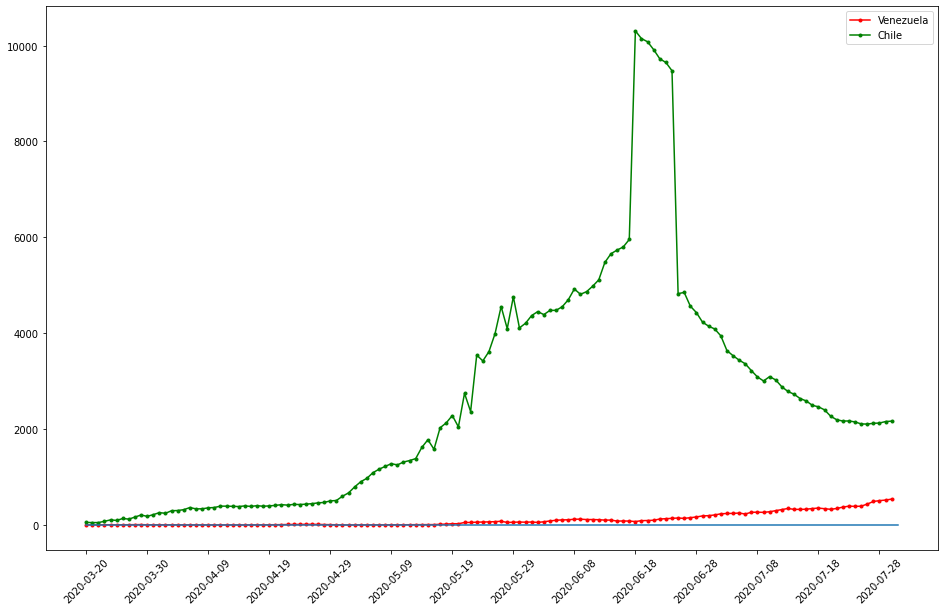

In [20]:
df_ven.index = df_ven.Date_reported
plt.figure(figsize=(16,10))
plt.plot(df_ven.Date_reported, df_ven.New_cases_roll_ven, 'r.-', label = 'Venezuela')
#plt.plot(df_ven.Date_reported, df_ven.New_cases_roll_col, 'b.-', label = 'Colombia')
#plt.plot(df_ven.Date_reported, df_ven.New_cases_roll_usa, 'b.-', label = 'EEUU')
#plt.plot(df_ven.Date_reported, df_ven.New_cases_roll_bra, 'g.-', label = 'Brasil')
plt.plot(df_ven.Date_reported, df_ven.New_cases_roll_chi, 'g.-', label = 'Chile')
#plt.plot(df_ven.Date_reported, df_ven.pct_chan_arg_roll, 'y.-', label = 'Argentina')
x_ticks = np.arange(0, len(df_ven.Date_reported), 10)
plt.xticks(x_ticks ,rotation=45)
plt.legend()
x_coordinates = [0, 133]
y_coordinates = [0, 0]
plt.plot(x_coordinates, y_coordinates)
plt.show()